Today we live in a digital era.There is an exponential increase in the information.We observe that today there is an increase in the amount of fake news.It is very  dangerous because fake news can cause communal disharmony,social unrest,can influence outcome of elections.So it is very import to stop this menance of fake news.We will try to build an algorithm to classify fake news.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


### Importing Modules 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [3]:
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

### Displaying Data

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


We can see hat in the data set we have the title,text,subject and data.But fake and true news are available in two sheets.First we have to give label to the news 1- True and 0-False.Then we will concanate the data.

### Creating Labels 

In [5]:
true['label'] = 1
fake['label'] = 0
#fake.head()

### Concanate Data

In [6]:
df = pd.concat([true,fake]) #Merging the 2 datasets
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Missing Values

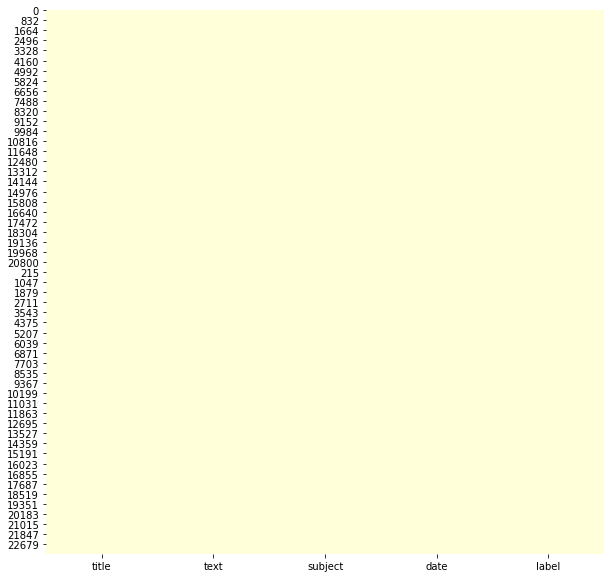

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()


We can see that there are no missing Values in the dataset.

### Count Plot

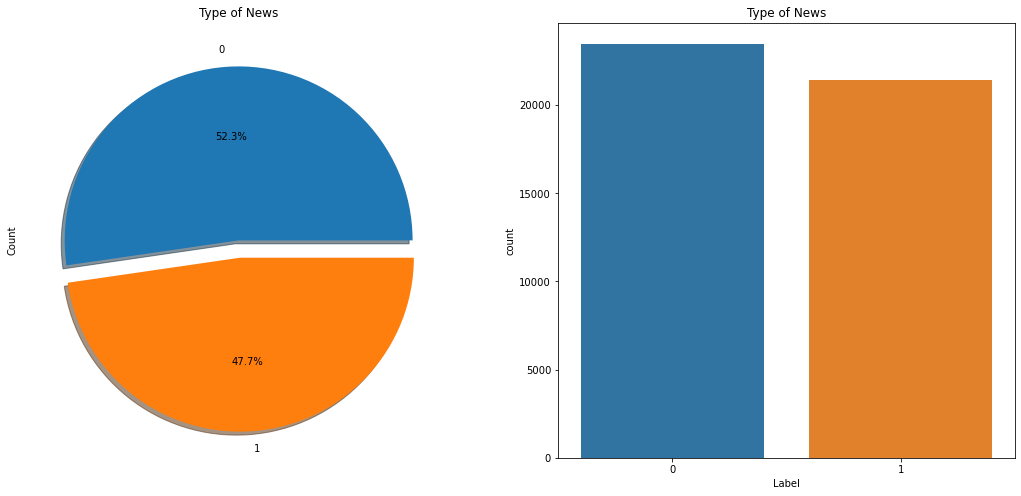

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type of News')
ax[0].set_ylabel('Count')
sns.countplot('label',data=df,ax=ax[1],order=df['label'].value_counts().index)
ax[1].set_title('Type of News')
ax[1].set_xlabel('Label')
plt.show()


We can see that there is more fake news in the data.Sill the difference is is 5.3% which is not very high.So we may not look at balancing the dataset.

### Word Cloud for Fake News 

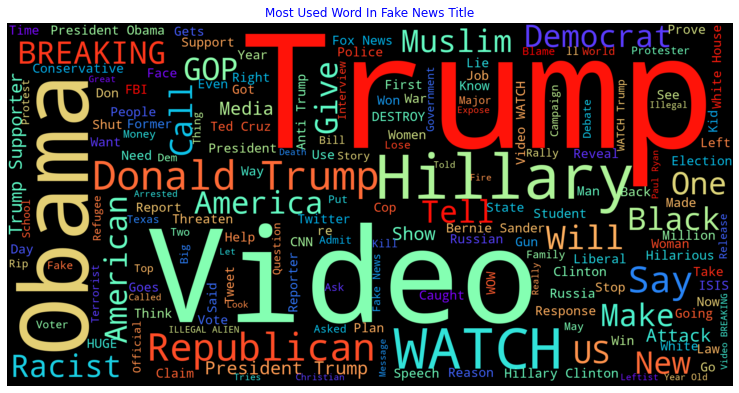

In [9]:
from wordcloud import WordCloud
wrds1 = fake["title"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(13,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Most Used Word In Fake News Title",color='b')
plt.show()

In the title of Fake news we can see the most frequent work is Trump,Obama,Hilary etc

### Creating Matrix of Features

In [10]:
#X = df.drop('label',axis=1)
#X.head()

In [11]:
df.shape

(44898, 5)

In [12]:
label = df['label']
#y

### Creating Bag of Words Using Count Vectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [14]:
df = df.dropna()
df.shape

(44898, 5)

In our case there were no missing values.But I have included thi step as part of pipeline as most dataset will have missing values

In [15]:
messages = df.copy()

In [16]:
messages.reset_index(inplace=True)

We reset the index because if the rows of the missing columns are dropped then there will be index which will be missing.This will cause problems while processing this data.So it always better to reset the index after rows are dropped.

In [17]:
messages['title'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [18]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation ]
    Test_punc_removed_join=''.join(Test_punc_removed)
    Test_punc_removed_join_clean=[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=message_cleaning)
df_countvectorizer=vectorizer.fit_transform(df['title'])

### Model Build

In [20]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(df_countvectorizer,label)

MultinomialNB()

In [21]:
testing_sample=['fake is name of vegetable']
testing_sample_countvectorizer=vectorizer.transform(testing_sample)
test_predict=NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])

### Creating Matrix of Features 

In [22]:
X=df_countvectorizer
X.shape

(44898, 44304)

In [23]:
label = df['label']
label.shape

(44898,)

### Test Train Split

In [24]:
X.shape 

(44898, 44304)

In [25]:
label.shape

(44898,)

In [26]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test,y_test=train_test_split(X,label,test_size=0.2)

### Fitting Model on Training Set

In [27]:
#from sklearn.naive_bayes import MultinomialNB
#NB_classifier=MultinomialNB()
#NB_classifier.fit(X_train,y_train)

### Model Evaluation 

In [28]:
#from sklearn.metrics import classification_report,confusion_matrix
#y_predict_train=NB_classifier.predict(X_train)
#y_predict_train

In [29]:
#cm=confusion_matrix(y_train,y_predict_train)
#sns.heatmap(cm,annot=True)

In [30]:
"""y_predict_test=NB_classifier.predict(X_test)
y_predict_test
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)"""

'y_predict_test=NB_classifier.predict(X_test)\ny_predict_test\ncm=confusion_matrix(y_test,y_predict_test)\nsns.heatmap(cm,annot=True)'

In [31]:
#print(classification_report(y_test,y_predict_test))

**TO BE CONTINUED**

In [32]:
df_clean=df['title'].apply(message_cleaning)

In [33]:
df_clean

0        [US, budget, fight, looms, Republicans, flip, ...
1        [US, military, accept, transgender, recruits, ...
2        [Senior, US, Republican, senator, Let, Mr, Mue...
3        [FBI, Russia, probe, helped, Australian, diplo...
4        [Trump, wants, Postal, Service, charge, much, ...
                               ...                        
23476    [McPain, John, McCain, Furious, Iran, Treated,...
23477    [JUSTICE, Yahoo, Settles, Email, Privacy, Clas...
23478    [Sunnistan, US, Allied, ‘Safe, Zone’, Plan, Ta...
23479    [Blow, 700, Million, Al, Jazeera, America, Fin...
23480    [10, US, Navy, Sailors, Held, Iranian, Militar...
Name: title, Length: 44898, dtype: object

In [34]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^A-Zaz-]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.word('english')]
    review = ' '.join(review)
    corpus.append(review)

AttributeError: 'WordListCorpusReader' object has no attribute 'word'

**TO BE CONTINUED**